<a href="https://colab.research.google.com/github/fenikowski/03MAIR--Algoritmos-de-Optimizacion--2020/blob/master/Igor_Fenikowski_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Nombre: Igor Fenikowski
# https://colab.research.google.com/drive/1cOJFvF5J6xthI8QWPFjWJLHgkDygwFkL?usp=sharing

### Programación dinámica

In [2]:
tariffs = [
           [0,5,4,3,999,999,999],
           [999,0,999,2,3,999,11],
           [999,999,0,1,999,4,10],
           [999,999,999,0,5,6,9],
           [999,999,999,999,0,999,4],
           [999,999,999,999,999,0,3],
           [999,999,999,999,999,999,0]
]

In [3]:
def prices(tariffs):
  N = len(tariffs[0])

  prices = [[9999]*N for i in [9999]*N]
  route = [[""]*N for i in [""]*N]

  for i in range(N-1):
    for j in range(i+1, N):
      MIN = tariffs[i][j]
      route[i][j] = i

      for k in range(i,j):
        if prices[i][k] + tariffs[k][j] < MIN:
          MIN = min(MIN, prices[i][k] + tariffs[k][j])
          route[i][j] = k
        prices[i][j] = MIN

  return prices, route

In [4]:
price, route = prices(tariffs)

In [5]:
display(route)

[['', 0, 0, 0, 1, 2, 5],
 ['', '', 1, 1, 1, 3, 4],
 ['', '', '', 2, 3, 2, 5],
 ['', '', '', '', 3, 3, 3],
 ['', '', '', '', '', 4, 4],
 ['', '', '', '', '', '', 5],
 ['', '', '', '', '', '', '']]

In [6]:
def calculate_route(route, origin, destination):
  if origin == destination:
    return destination
  else:
    return str(calculate_route(route, origin, route[origin][destination])) + ' , ' + str(route[origin][destination])

print("\nLa ruta es:")
calculate_route(route, 0, 6)


La ruta es:


'0 , 0 , 2 , 5'

### Ramificación y Poda

#### Brute force

In [7]:
import itertools

costs = [
         [11,12,18,40],
         [14,15,13,22],
         [11,17,19,23],
         [17,14,20,28]
]

def value(s,costs):
  value = 0
  for i in range(len(s)):
    value += costs[i][s[i]]
  return value

def brute_force(costs):

  best_value = 10e10
  best_solution = ()

  for s in list(itertools.permutations(range(len(costs)))):
    tmp_value = value(s, costs)
    if tmp_value < best_value:
      best_value = tmp_value
      best_solution = s

  print("La mejor solución es: ", best_solution, " con valor: ", best_value)

brute_force(costs)

La mejor solución es:  (0, 2, 3, 1)  con valor:  61


#### Ramificación y poda

In [8]:

def create_children(node, n):
  children = []
  for i in range(n):
    if i not in node:
      children.append({'s': node + (i,)})
  return children


def CI(s, costs):
  value = 0

  for i in range(len(s)):
    value += costs[i][s[i]]

    for i in range(len(costs)):
      if i not in s:
        value += min([costs[j][i] for j in range(len(s),len(costs))])
  return value


def branch_and_bound(costs):
  dimension = len(costs)
  best_solution = tuple(i for i in range(len(costs)))
  cota_sup = value(best_solution, costs)

  nodes=[]
  nodes.append({'s':(), 'ci': CI((),costs)})

  iteration = 0

  while(len(nodes) > 0):
    iteration += 1

    promising_node = [min(nodes, key=lambda x: x['ci'])][0]['s']

    # Branching
    children = [{'s': x['s'], 'ci': CI(x['s'], costs)} for x in create_children(promising_node, dimension) ]

    # Final solution
    final_node = [x for x in children if len(x['s']) == dimension]
    if len(final_node) > 0:
      if final_node[0]['ci'] < cota_sup:
        cota_sup = final_node[0]['ci']
        best_solution = final_node

    # Bounding
    children = [x for x in children if x['ci'] < cota_sup]

    # Adding children
    nodes.extend(children)

    # Removing branched node
    nodes = [ x for x in nodes if x['s'] != promising_node]

  print("La solución final es: ", best_solution, " en ", iteration, " iteraciones para dimensión: ", dimension)

branch_and_bound(costs)

La solución final es:  (0, 1, 2, 3)  en  4  iteraciones para dimensión:  4


### Descenso de gradiente

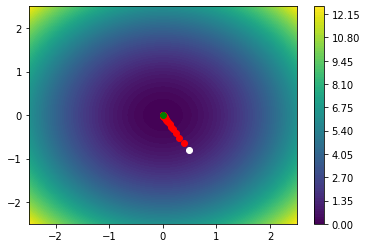

Solución: [1.6964191355841325e-49, -2.836222723340198e-49] 1.0921997219967305e-97


In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

f = lambda X: X[0]**2 + X[1]**2
df = lambda X: [2*X[0], 2*X[1]]

resolution = 100
rango = 2.5
X = np.linspace(-rango, rango, resolution)
Y = np.linspace(-rango, rango, resolution)
Z = np.zeros((resolution, resolution))

for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

plt.contourf(X,Y,Z,resolution)
plt.colorbar()

P = [random.uniform(-2,2), random.uniform(-2,2)]
plt.plot(P[0],P[1],"o",c="white")


TA = .1

for _ in range(500):
  grad = df(P)
  P[0],P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")


plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solución:" , P, f(P))